<img src="images/logodwengo.png" alt="Banner" width="150"/>

<div>
    <font color=#690027 markdown="1">  
        <h1>LINEAIRE REGRESSIE</h1> 
    </font>
</div>

<div class="alert alert-box alert-success">
In deze notebook zal je leren hoe je een regressielijn bepaalt met Python. Je gebruikt daarbij de data van de vorige notebook. Een regressielijn is een rechte die het best past bij de data en een eventuele trend die vervat is in de data, weerspiegelt. 
</div>

### Nodige modules importeren

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy.optimize import curve_fit    # voor regressie

<div>
    <font color=#690027 markdown="1">  
        <h2>1. Data inlezen en visualiseren</h2> 
    </font>
</div>

Je leest een csv-file in die 15 datapunten bevat. Je zal deze data visualiseren.<br>
Je vindt het bestand in de map `data`: `punten.csv`.

### Opgave
- Lees het bestand in.
- Laat de inhoud zien.

In [2]:
# voorbeeldscript
punten = pd.read_csv("data/punten.csv")
punten

,x,y
0,28,33
1,40,35
2,41,47
3,44,35
4,45,55
5,51,56
6,54,50
7,57,50
8,57,70
9,60,65


- Laat de puntenwolk zien.

In [3]:
# voorbeeldscript
# kolommen apart inlezen en in juiste gedaante brengen
x = punten["x"]
y = punten["y"]

x = np.array(x)
y = np.array(y)

In [4]:
# voorbeeldscript
# minima en maxima bepalen
x_min = x.min()
x_max = x.max()
y_min = y.min()
y_max = y.max()
print(x_min, x_max, y_min, y_max)

28 113 33 100


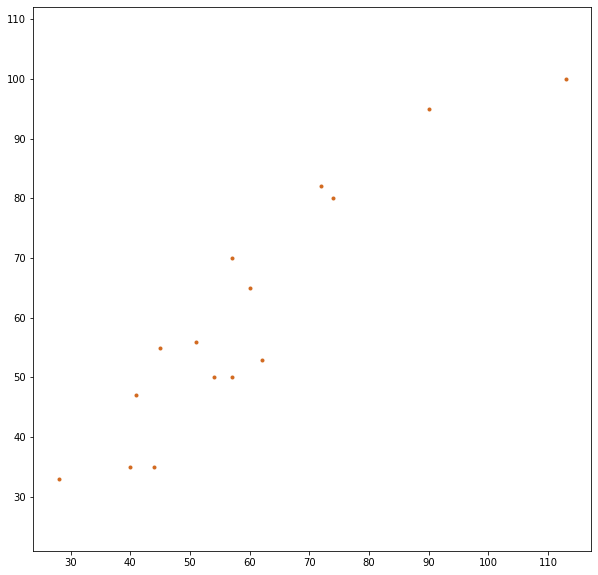

In [5]:
# voorbeeldscript
# puntenwolk
plt.figure(figsize=(10,10))                         # creëer tekenvenster

plt.axis(xmin=0, xmax=130, ymin=0, ymax=130)        # vensterinstellingen
plt.axis("equal")  
plt.xticks(np.arange(0, 130, step=10))
plt.yticks(np.arange(0, 130, step=10))

plt.scatter(x, y, color="chocolate", marker=".")    # plot puntenwolk

plt.show()                                          # toon grafiek

De puntenwolk ziet er *ellipsvormig* uit.<br> 
Men spreekt dan van *lineaire samenhang*: je zou dan een rechte kunnen vinden die vrij goed bij de data past. Hoe sterker de samenhang tussen de punten, hoe beter de rechte bij de data zal passen. <br><br>
In hoeverre er samenhang is tussen de x- en y- coördinaat van de gegeven punten, kan bekeken worden a.d.h.v. de *correlatiecoëfficiënt R*.

De correlatiecoëfficiënt R ligt steeds tussen -1 en 1. Hoe dichter R bij 0 ligt, hoe slechter de samenhang. <br>
Bij een positieve R spreekt men van een positieve samenhang, bij een negatieve R van een negatieve samenhang. 

<div>
    <font color=#690027 markdown="1">  
        <h2>2. De correlatiecoëfficiënt</h2> 
    </font>
</div>

Je kan de correlatiecoëfficiënt bepalen met de functie `corrcoef()` uit de module NumPy. Deze functie geeft eigenlijk een tabel terug met 2 rijen en 2 kolommen, waarvan de correlatiecoëfficiënt te vinden is op de eerste rij in de tweede kolom.  

In [ ]:
# np.corrcoef(x, y)

In [6]:
print("Correlatiecoëfficiënt R =", np.corrcoef(x, y)[0,1])     # 0 wijst op eerste rij en 1 op tweede kolom

Correlatiecoëfficiënt R = 0.9261218269692413


Dit wijst op een *positieve sterke lineaire samenhang*. 

<div>
    <font color=#690027 markdown="1">  
        <h2>3. Lineaire regressie</h2> 
    </font>
</div>

In [7]:
# regressielijn is rechte

# ingeven hoe vergelijking rechte is opgebouwd 
def rechte(x, a, b):
    """Voorschrift (schuine) rechte met variabele x en coëfficiënten a en b."""
    return a * x + b

# rechte zoeken die beste past bij bepaalde data, vergelijking tonen en 'onthouden'
def linreg(rechte, x, y):
    """Rechte best passend bij datapunten x en y."""
    popt, pcov = curve_fit(rechte, x, y)            # curve_fit kijkt in def rechte hoe functievoorschrift eruit ziet
    # curve_fit geeft twee zaken terug, waaraan gerefereerd wordt met popt en pcov
    # enkel eerste nodig, die a en b van gezochte rechte geeft
    a, b = popt                                     # coëfficiënten
    print("y = ", a, "x +", b)                      # toon vergelijking regressielijn
    return rechte(x, a, b)                          # geeft f(x) terug van regressielijn f

In [8]:
# regressielijn zoeken bij gegeven punten
y_regressielijn = linreg(rechte, x, y)                # y_regressielijn verwijst naar f(x) van regressielijn f

y =  0.9134752653464687 x + 6.322264291489486


### Geef nu de puntenwolk en de regressielijn samen weer in een grafiek

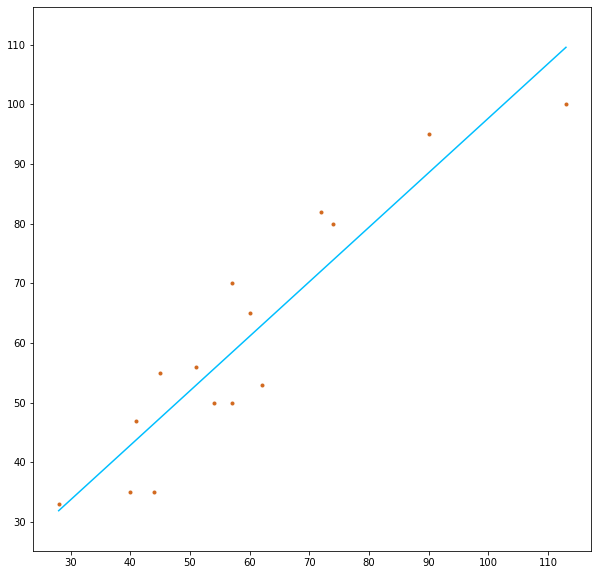

In [9]:
# voorbeeldscript
# grafiek puntenwolk samen met regressielijn
plt.figure(figsize=(10,10))                         # creëer tekenvenster

plt.axis(xmin=0, xmax=130, ymin=0, ymax=130)        # vensterinstellingen
plt.axis("equal")
plt.xticks(np.arange(0, 130, step=10))
plt.yticks(np.arange(0, 130, step=10))
                        
plt.scatter(x, y, color="chocolate", marker=".")    # plot puntenwolk     

plt.plot(x, y_regressielijn, color="deepskyblue")   # plot regressielijn

plt.show()                                          # toon grafiek

<div class="alert alert-box alert-warning">
In de volgende notebooks ga je hiermee aan de slag om zelf de regressielijn bij bepaalde data te visualiseren, en de vergelijking van de rechte weer te geven.
</div>

<img src="images/cclic.png" alt="Banner" align="left" width="100"/><br><br>
Notebook Python in wiskunde, zie Computationeel denken - Programmeren in Python van <a href="http://www.aiopschool.be">AI Op School</a>, van F. wyffels, B. Van de Velde & N. Gesquière, in licentie gegeven volgens een <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Naamsvermelding-NietCommercieel-GelijkDelen 4.0 Internationaal-licentie</a>. 